# Index

1. [Data exploration and cleaning](#dec)

2. [Data summary](#ds)

3. [Model building](#model)

  3.1 [Data preparation](#data_preparation)

  3.2 [Training](#train)

  3.3 [Validation](#val)
  

4. [Improvements](#improvements)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import feather

In [2]:
PATH = os.path.join(os.getcwd(),'data')
file = 'yellow_tripdata_2017-03.csv'

In [3]:
# Read a small subset to check datatypes
df_temp = pd.read_csv(os.path.join(PATH, file),nrows=5)
df_temp.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0,0.3,13.30


In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
VendorID                 5 non-null int64
tpep_pickup_datetime     5 non-null object
tpep_dropoff_datetime    5 non-null object
passenger_count          5 non-null int64
trip_distance            5 non-null float64
RatecodeID               5 non-null int64
store_and_fwd_flag       5 non-null object
PULocationID             5 non-null int64
DOLocationID             5 non-null int64
payment_type             5 non-null int64
fare_amount              5 non-null float64
extra                    5 non-null float64
mta_tax                  5 non-null float64
tip_amount               5 non-null float64
tolls_amount             5 non-null int64
improvement_surcharge    5 non-null float64
total_amount             5 non-null float64
dtypes: float64(7), int64(7), object(3)
memory usage: 760.0+ bytes


In [5]:
# Set columns to most suitable type to optimize for memory usage
types = {'VendorID': 'int8',
              'tpep_pickup_datetime': 'str', 
              'tpep_dropoff_datetime': 'str',
              'passenger_count': 'uint8',
              'trip_distance': 'float32',
              'RatecodeID': 'float32',
              'store_and_fwd_flag': 'str', 
              'PULocationID': 'int8',
              'DOLocationID':'int8',
              'payment_type':'int8',
              'fare_amount':'float32',
              'extra':'float32',
              'mta_tax':'float32',
              'tip_amount':'float32',
              'tolls_amount':'float32',
              'improvement_surcharge':'float32',
              'total_amount':'float32'
              }

cols = list(types.keys())

In [6]:
%%time
# Read minimum dataset: march, june and november
df_list = []
for file in ['yellow_tripdata_2017-03.csv', 'yellow_tripdata_2017-06.csv', 'yellow_tripdata_2017-11.csv']:
    if file.endswith('.csv'):
        print(file)
        df_raw = pd.read_csv(os.path.join(PATH, file), usecols = cols, dtype = types)
        df_list.append(df_raw)

yellow_tripdata_2017-03.csv
yellow_tripdata_2017-06.csv
yellow_tripdata_2017-11.csv
Wall time: 2min 37s


In [7]:
%%time
df_raw = pd.concat(df_list)
df_raw.head()

# Delete to release memory
del df_list

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29236424 entries, 0 to 9284802
Data columns (total 17 columns):
VendorID                 int8
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          uint8
trip_distance            float32
RatecodeID               float32
store_and_fwd_flag       object
PULocationID             int8
DOLocationID             int8
payment_type             int8
fare_amount              float32
extra                    float32
mta_tax                  float32
tip_amount               float32
tolls_amount             float32
improvement_surcharge    float32
total_amount             float32
dtypes: float32(9), int8(4), object(3), uint8(1)
memory usage: 2.0+ GB
Wall time: 6 s


In [8]:
df_raw.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9284798,2,2017-11-30 23:27:24,2017-11-30 23:48:15,1,3.16,1.0,N,90,-115,1,15.0,0.5,0.5,2.70,0.0,0.3,19.000000
9284799,1,2017-11-30 23:59:05,2017-11-30 23:59:14,1,0.00,1.0,N,25,25,2,2.5,0.5,0.5,0.00,0.0,0.3,3.800000
9284800,2,2017-11-30 23:17:20,2017-11-30 23:39:33,1,10.28,1.0,N,-95,127,1,30.0,0.5,0.5,6.26,0.0,0.3,37.560001
9284801,2,2017-11-30 22:52:40,2017-11-30 23:27:26,1,5.80,1.0,N,113,-75,1,24.5,0.5,0.5,5.16,0.0,0.3,30.959999
9284802,2,2017-11-30 23:33:39,2017-11-30 23:42:54,1,1.68,1.0,N,-75,25,1,8.5,0.5,0.5,2.45,0.0,0.3,12.250000


In [9]:
%%time
# Save it into feather file. Next time, we just have to load this file (it will be faster)
df_raw.reset_index().to_feather(os.path.join(PATH, 'yellow_tripdata_mindataset.feather'))

Wall time: 33.5 s


In [10]:
%%time
# Load dataset faster from feather file
df_raw= feather.read_dataframe(os.path.join(PATH, 'yellow_tripdata_mindataset.feather')).drop('index', axis=1)

Wall time: 12.7 s


In [11]:
# Check what we have loaded
df_raw.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1.0,N,-108,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.360001
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1.0,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.800000
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1.0,N,79,-94,1,10.0,0.5,0.5,2.82,0.0,0.3,14.120000
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1.0,N,-19,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.290001
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1.0,N,41,-94,2,12.0,0.5,0.5,0.00,0.0,0.3,13.300000


In [12]:
df = df_raw.copy()

## Data exploration and cleaning  <a name="dec"></a>

In [13]:
# Check missing values
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [14]:
#Check duplicated values
if len(df) != len(df.drop_duplicates()):
    print('There are ', len(df) - len(df.drop_duplicates()), ' duplicates. Removing...')
    df = df.drop_duplicates()

There are  29  duplicates. Removing...


In [15]:
# Statistics from our data. We can see max and min values quite easy, as well as mean value, for example.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07,2.923640e+07
mean,1.545903e+00,1.617798e+00,2.565598e+00,6.245664e-01,-2.512274e+01,-2.083591e+01,1.329499e+00,1.150675e+01,3.119666e-01,2.869446e-01,1.827452e+00,3.352711e-01,2.869235e-01,1.444351e+01
std,4.978884e-01,1.260992e+00,4.338863e+00,5.928043e-01,7.297276e+01,7.114500e+01,4.903468e-01,1.470664e+02,4.201783e-01,1.921162e-01,2.453847e+00,1.952719e+00,1.615438e-02,1.472084e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.280000e+02,-1.280000e+02,1.000000e+00,-5.500000e+02,-5.371000e+01,-5.000000e-01,-1.120000e+02,-1.750000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,-9.400000e+01,-9.300000e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,-2.200000e+01,-2.000000e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.010000e+00,1.000000e+00,1.400000e+01,4.100000e+01,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,1.920000e+02,9.496980e+03,9.900000e+01,1.270000e+02,1.270000e+02,5.000000e+00,6.304618e+05,6.980000e+01,1.400000e+02,4.500000e+02,1.018950e+03,1.000000e+00,6.304631e+05


In [16]:
# Function to plot histogram, removing outliers (5percentil-95percentil)
def plot_hist(df, f, nbins, remove_outliers):
    feat = df[f]
    cond = np.repeat(True, len(feat))
    if remove_outliers:
        p95 = feat.quantile(0.95)
        p05 = feat.quantile(0.05)
        cond = cond & (feat>p05)
        cond = cond & (feat<p95)
        
    feat[cond]. hist(bins = nbins)
    plt.title(f)
    plt.show()

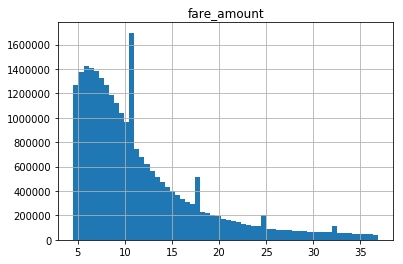

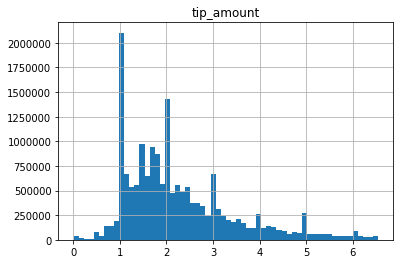

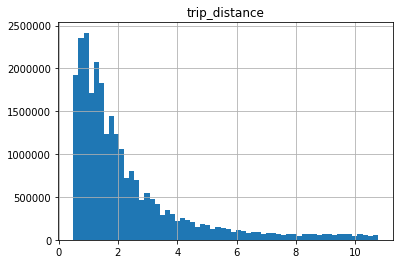

In [17]:
#Checking some distributions
for col in ['fare_amount', 'tip_amount', 'trip_distance']:
    plot_hist(df,col, 60, True)

We can see that there is a minimum fare and the great majority of trips costs between 5 and 10\\$

Tips are quite variable, being 1-2\\$ the most frequent tips.

Distance is usually shorter than 2 miles

In [18]:
print('Average fare_amount: ', df['fare_amount'].mean())
print('Average tip_amount: ', df['tip_amount'].mean())
print('Average trip_distance: ', df['trip_distance'].mean())

Average fare_amount:  11.506752014160156
Average tip_amount:  1.8274518251419067
Average trip_distance:  2.5655977725982666


#### Removing outliers and negative values

#Passenger count should be greater than 0 
#Trip_distance should be greater than 0 
#fare_amount should be greater than 0
#extra, tip_amount, tolls_amount, MTA_tax, improvement_surcharge should be non-negative 

Outliers are removed with 99-percentil

In [19]:
df_clean = df[(df['passenger_count']>0) & ( df['passenger_count']<= df['passenger_count'].quantile(0.99))]
print('Total taxi trips: ', len (df))
print('\tTaxi trips with passenger_count > 0: ', len(df_clean), '(%.2f%%)'%(len(df_clean)/(len(df))*100))
print()

df_clean = df_clean[(df_clean['trip_distance'] > 0) & (df_clean['trip_distance'] <= df_clean['trip_distance'].quantile(0.99))]
print('\tTaxi trips with distance > 0: ', len(df_clean), '(%.2f%%)'%(len(df_clean)/(len(df))*100))
print()

df_clean = df_clean[(df_clean['fare_amount']>0) & (df_clean['fare_amount'] <= df_clean['fare_amount'].quantile(0.99))]
print('\tTaxi trips with fare_amounts > 0: ', len(df_clean), '(%.2f%%)'%(len(df_clean)/(len(df))*100))
print()
    
for var in ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'mta_tax']:
    df_clean = df_clean[(df_clean[var]>=0) & (df_clean[var] <= df_clean[var].quantile(0.99))]
    print('\tTaxi trips with %s >= 0: '%(var), len(df_clean), '(%.2f%%)'%(len(df_clean)/(len(df))*100))
    print()

Total taxi trips:  29236395
	Taxi trips with passenger_count > 0:  29184392 (99.82%)

	Taxi trips with distance > 0:  28703595 (98.18%)

	Taxi trips with fare_amounts > 0:  28583814 (97.77%)

	Taxi trips with extra >= 0:  28498559 (97.48%)

	Taxi trips with tip_amount >= 0:  28216626 (96.51%)

	Taxi trips with tolls_amount >= 0:  28201878 (96.46%)

	Taxi trips with improvement_surcharge >= 0:  28201878 (96.46%)

	Taxi trips with mta_tax >= 0:  28201271 (96.46%)



In [20]:
print('Taxi trips paid with credit card: ',len(df_clean[df_clean['payment_type']==1]),
                                          '(%.2f%%)'%(len(df_clean[df_clean['payment_type']==1])/(len(df_clean))*100))

Taxi trips paid with credit card:  19095703 (67.71%)


In [21]:
# We just need payment_type = 1 (credit card payment)
# Cash tip amounts are not included

df_in = df_clean[df_clean['payment_type']==1]

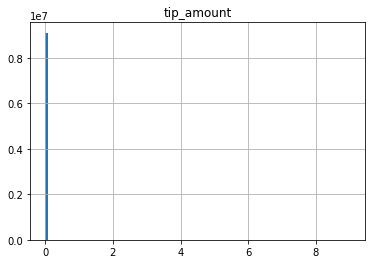

[0.         0.56999999 1.75       5.25       1.70000005 3.42000008
 6.19000006 0.41999999 6.71999979 8.22999954 1.10000002 0.63999999
 0.49000001 1.         5.36999989 0.72000003 2.75       1.15999997
 1.25       1.54999995 2.22000003 1.39999998 1.59000003 0.27000001
 1.86000001 2.46000004 4.46999979 5.44000006 4.8499999  2.06999993
 5.1500001  5.         1.73000002 1.09000003 5.82000017 0.77999997
 1.62       1.47000003 1.36000001 1.03999996 2.51999998 2.55999994
 1.04999995 0.51999998 0.68000001 0.86000001 1.91999996 1.19000006
 4.55999994 1.27999997 1.52999997 1.08000004 3.05999994 2.5999999
 1.05999994 0.82999998 1.32000005 4.26000023 1.64999998 3.55999994
 0.99000001 4.15999985 0.98000002 4.55000019 1.65999997 0.87
 1.17999995 7.71000004 1.23000002 0.73000002 1.75999999 0.93000001
 0.79000002 2.20000005 0.57999998 1.76999998 4.61999989 0.88
 1.88999999 1.16999996 3.3499999  0.95999998 1.25999999 0.94999999
 1.58000004 2.66000009 1.85000002 1.55999994 0.63       2.97000003
 5.05999

In [22]:
#If payment_method != credit card, what do tip amounts look like? Are they included?
plot_hist(df_clean[df_clean['payment_type']!=1],'tip_amount', 100, False)

print(df_clean[df_clean['payment_type']!=1]['tip_amount'].unique())

print('\nTaxi trips with payment other than credit card and tip: ',
                      len(df_clean[(df_clean['payment_type']!=1) & df_clean['tip_amount']!=0]))

There are few trips with tip included and payment other than credit card. Good! That's what we expected

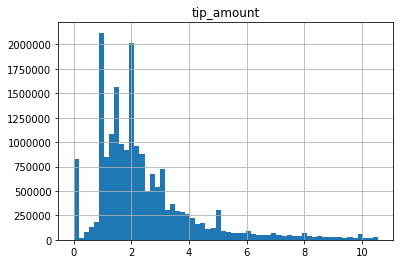

In [23]:
plot_hist(df_in,'tip_amount', 60, False)

In [24]:
# Type conversion to datetime
df_in['tpep_pickup_datetime'] = pd.to_datetime(df_in['tpep_pickup_datetime'])
df_in['tpep_dropoff_datetime']  = pd.to_datetime(df_in['tpep_dropoff_datetime'])

C:\Users\arturo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\arturo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# Split dates to get fields like day, hour, weekday.
# We'll check if tip depends on them
df_in['year'] = df_in['tpep_pickup_datetime'].dt.year
df_in['month'] = df_in['tpep_pickup_datetime'].dt.month
df_in['day'] = df_in['tpep_pickup_datetime'].dt.day
df_in['weekday'] =df_in['tpep_pickup_datetime'].dt.dayofweek
df_in['hour'] = df_in['tpep_pickup_datetime'].dt.hour

C:\Users\arturo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\arturo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\arturo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [26]:
df_in.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,year,month,day,weekday,hour
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1.0,N,-108,48,1,...,0.5,3.06,0.0,0.3,18.360001,2017,3,9,3,21
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1.0,N,79,-94,1,...,0.5,2.82,0.0,0.3,14.120000,2017,3,9,3,22
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1.0,N,-19,41,1,...,0.5,3.99,0.0,0.3,17.290001,2017,3,9,3,22
5,1,2017-03-01 00:00:00,2017-03-01 00:14:22,1,2.80,1.0,N,5,79,1,...,0.5,1.00,0.0,0.3,14.800000,2017,3,1,2,0
6,1,2017-03-01 00:00:00,2017-03-01 00:19:30,1,6.00,1.0,N,87,-114,1,...,0.5,3.50,0.0,0.3,24.299999,2017,3,1,2,0


In [27]:
%%time
# Save cleaned dataset into feather file
df_in.reset_index().to_feather(os.path.join(PATH,'input_min_dataset.feather'))

Wall time: 24.1 s


# Data summary  <a name="ds"></a>

As we are trying to predict tips, we'll check if our features affect tip amount

#### Tip - #passenger

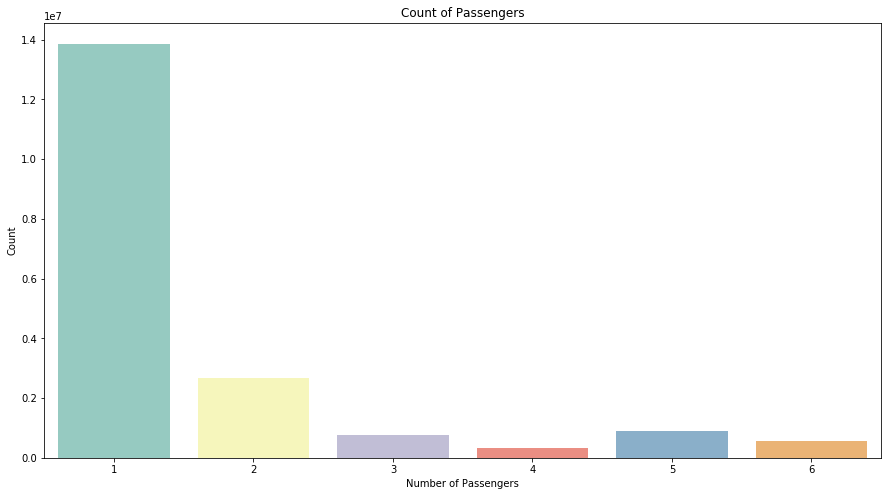

In [28]:
passenger_count = df_in.groupby(['passenger_count']).count()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(passenger_count.index, passenger_count['VendorID'], palette = "Set3")

plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')
plt.show()

The main part of the trips are 1-person trips. Let's see if tip_amount depends on passenger count

Text(0, 0.5, 'Tip')

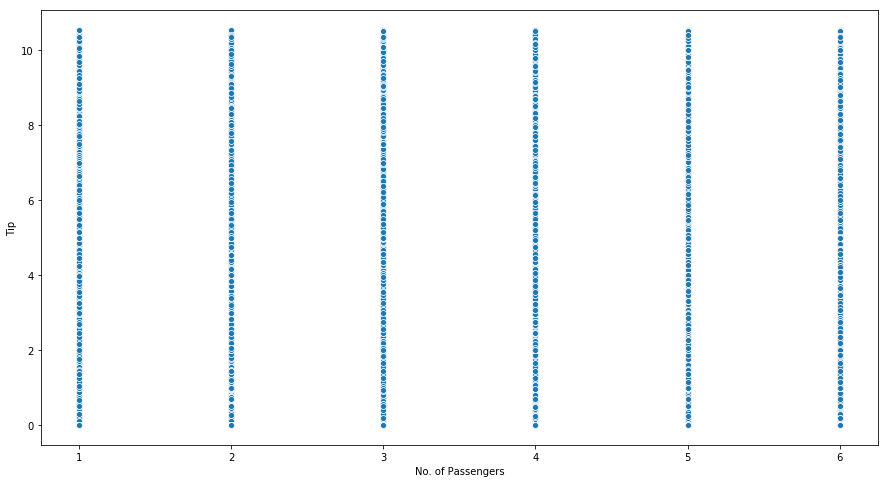

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_in['passenger_count'], y=df_in['tip_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Tip')

There is no clear relationship between number og passengers and tip amount

#### Tip - hour

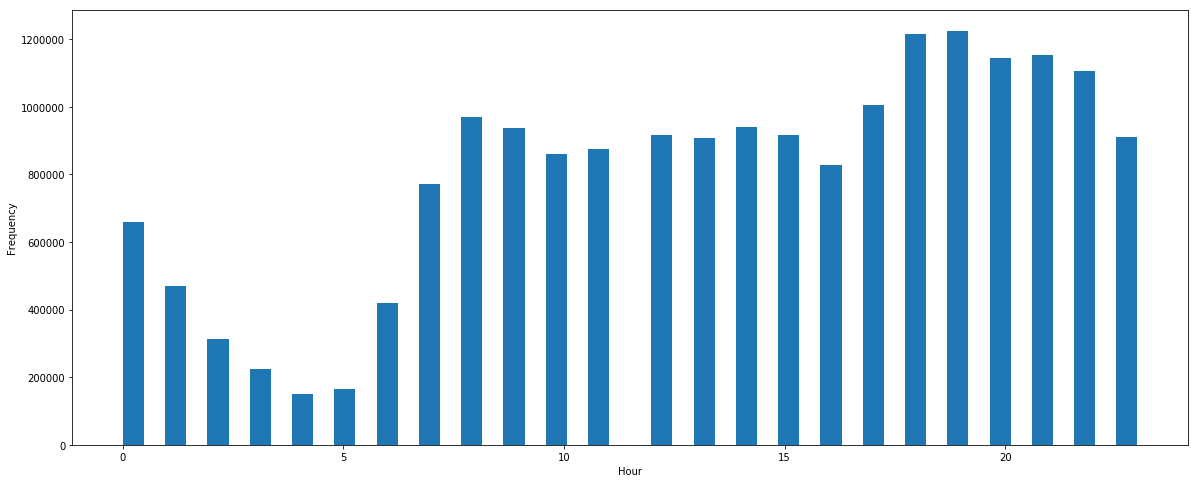

In [30]:
plt.figure(figsize=(20,8))
plt.hist(df_in['hour'], bins = 48, )

plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

The time of day plays an important role. The frequency of taxi trips are the lowest at 4-5AM and the highest at 6-7PM.

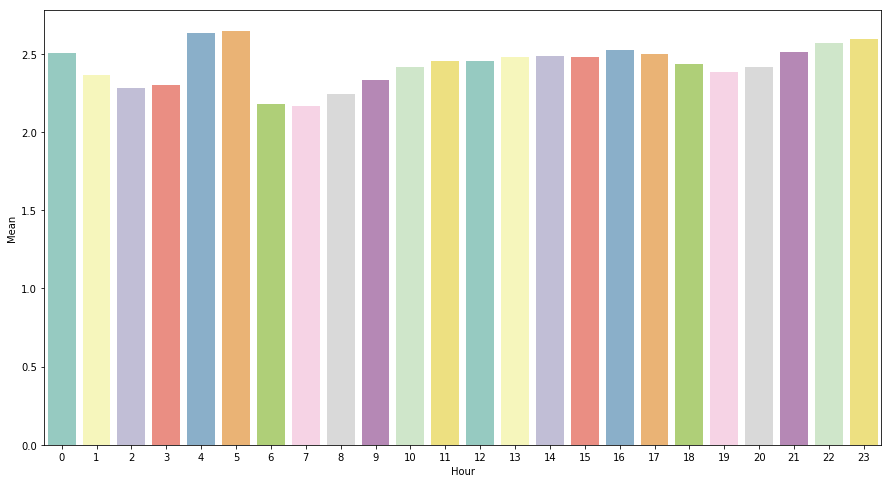

In [31]:
hour_tip = df_in.groupby(['hour'])['tip_amount'].mean().reset_index()
pfig, ax = plt.subplots(figsize=(15,8))

sns.barplot(hour_tip.index, hour_tip['tip_amount'], palette = "Set3")

plt.xlabel('Hour')
plt.ylabel('Mean')
plt.show()

However, the mean tip seems pretty similar among the hours. Specially, at 4-5AM tips are the highest and at 7AM the lowest

#### Tip - weekday

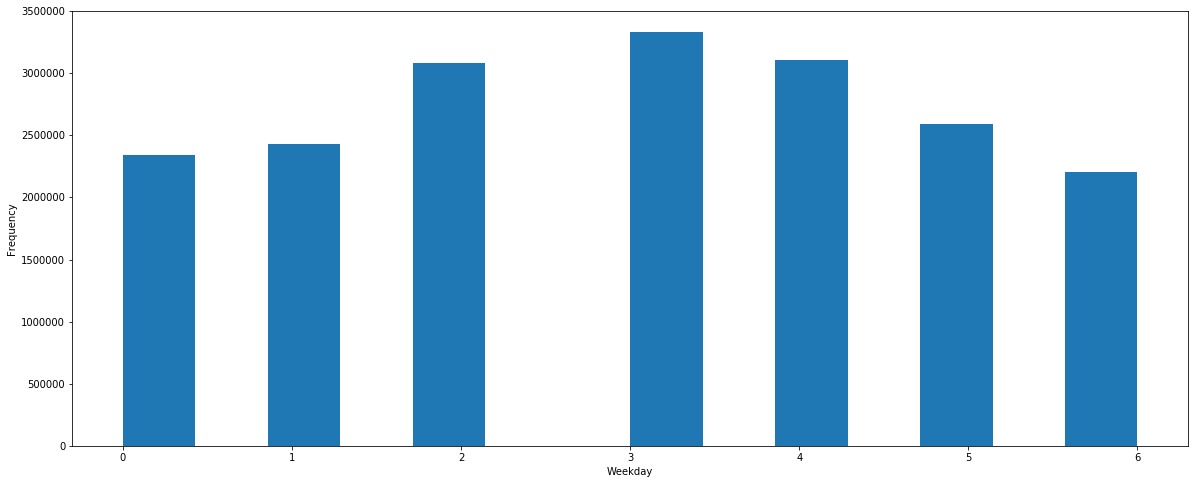

In [32]:
plt.figure(figsize=(20,8))
plt.hist(df_in['weekday'], bins = 14)

plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.show()

Wednesday, Thursday and Friday are the most frequent days for taxi trips

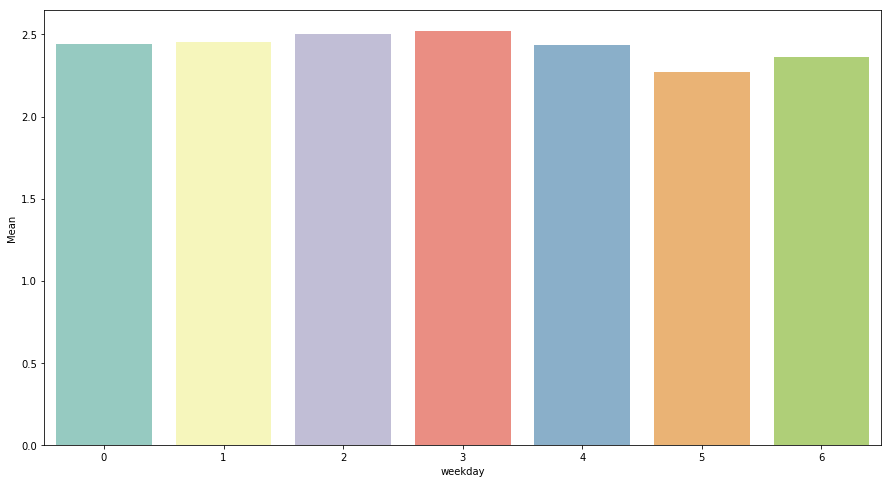

In [33]:
weekday_tip = df_in.groupby(['weekday'])['tip_amount'].mean().reset_index()
pfig, ax = plt.subplots(figsize=(15,8))

sns.barplot(weekday_tip.index, weekday_tip['tip_amount'], palette = "Set3")

plt.xlabel('weekday')
plt.ylabel('Mean')
plt.show()

However, tip does not change significantly depending on weekday

#### Tip - distance

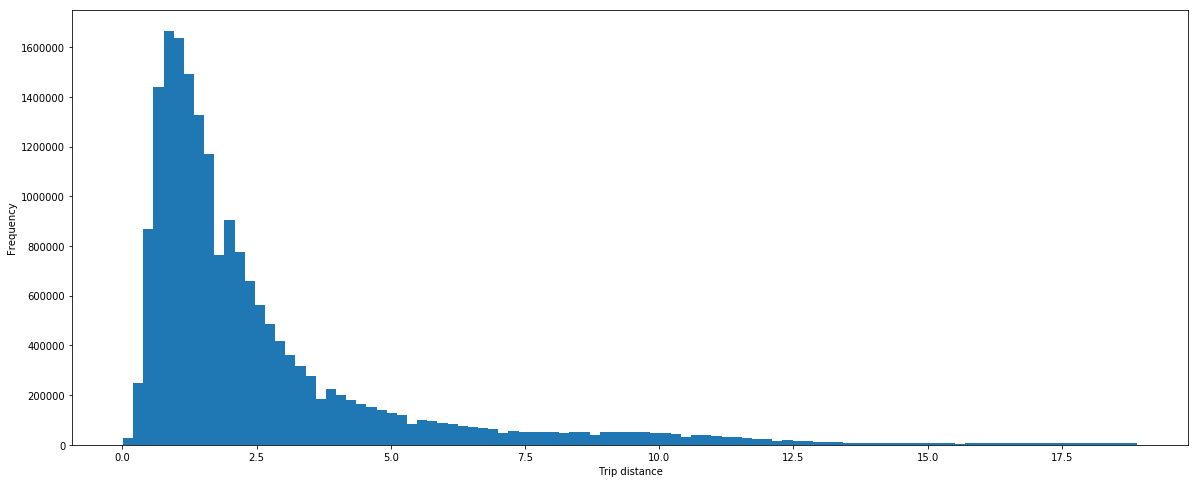

In [34]:
plt.figure(figsize=(20,8))
plt.hist(df_in['trip_distance'], bins = 100 )

plt.xlabel('Trip distance')
plt.ylabel('Frequency')
plt.show()

Most rides are shorter than 2.5 miles

Text(0, 0.5, 'Tip')

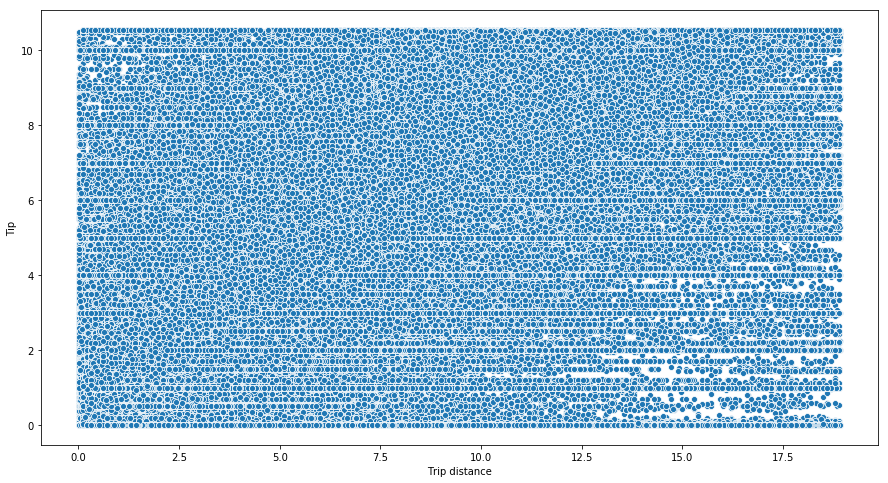

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_in['trip_distance'], y=df_in['tip_amount'])
plt.xlabel('Trip distance')
plt.ylabel('Tip')

Nothing clear here

#### Tip - pickup location

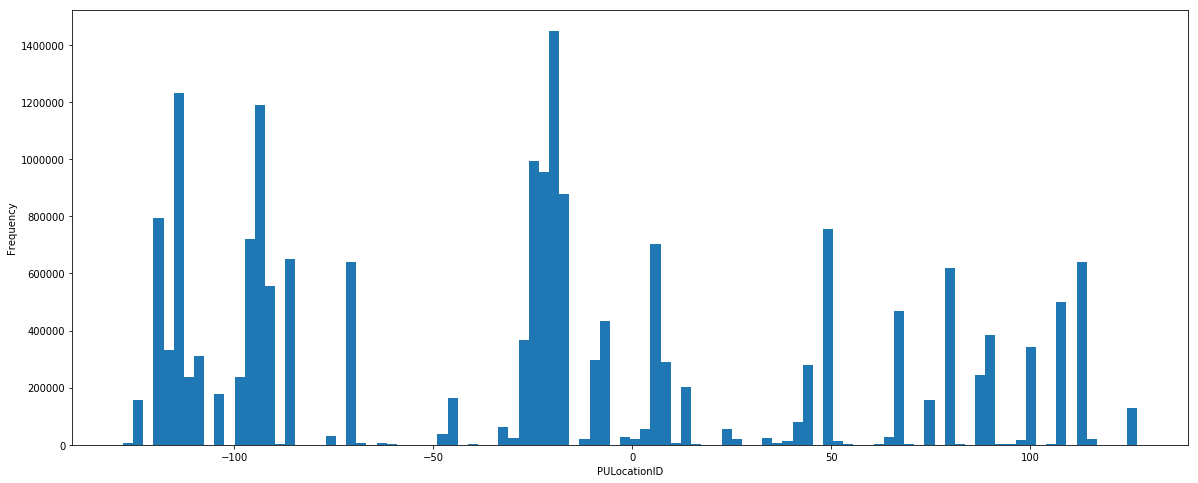

In [36]:
plt.figure(figsize=(20,8))
plt.hist(df_in['PULocationID'], bins = 100 )

plt.xlabel('PULocationID')
plt.ylabel('Frequency')
plt.show()

We can see the distribution of taxi trips based on Pickup Location (by ID)

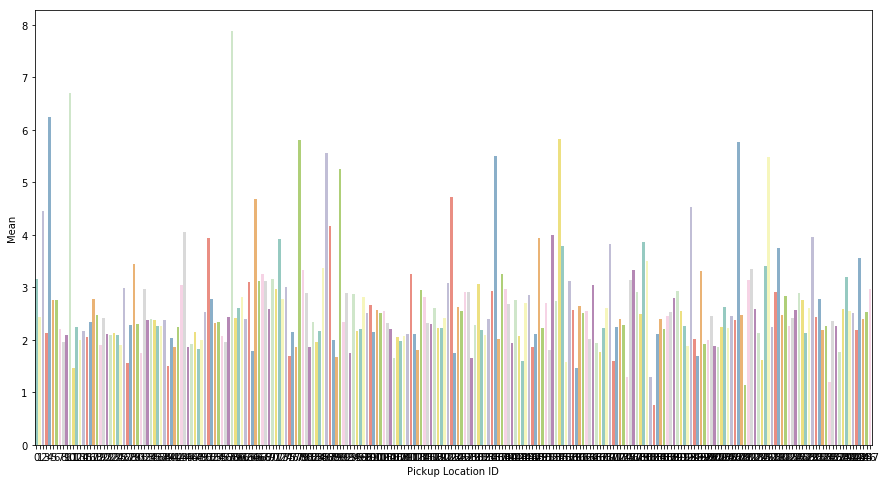

In [37]:
pickup_tip = df_in.groupby(['PULocationID'])['tip_amount'].mean().reset_index()
pfig, ax = plt.subplots(figsize=(15,8))

sns.barplot(pickup_tip.index, pickup_tip['tip_amount'], palette = "Set3")

plt.xlabel('Pickup Location ID')
plt.ylabel('Mean')
plt.show()

People living in some neighbourhoods give higher tips. Maybe they grab a taxi from home...

In [38]:
pickup_tip.sort_values('tip_amount', ascending=False)

,PULocationID,tip_amount
58,-69,7.890000
10,-118,6.696073
4,-124,6.240404
155,30,5.816667
78,-49,5.802767
208,84,5.760000
86,-41,5.563520
136,10,5.503830
217,93,5.475059
90,-37,5.247524


#### Tip - dropoff 

C:\Users\arturo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


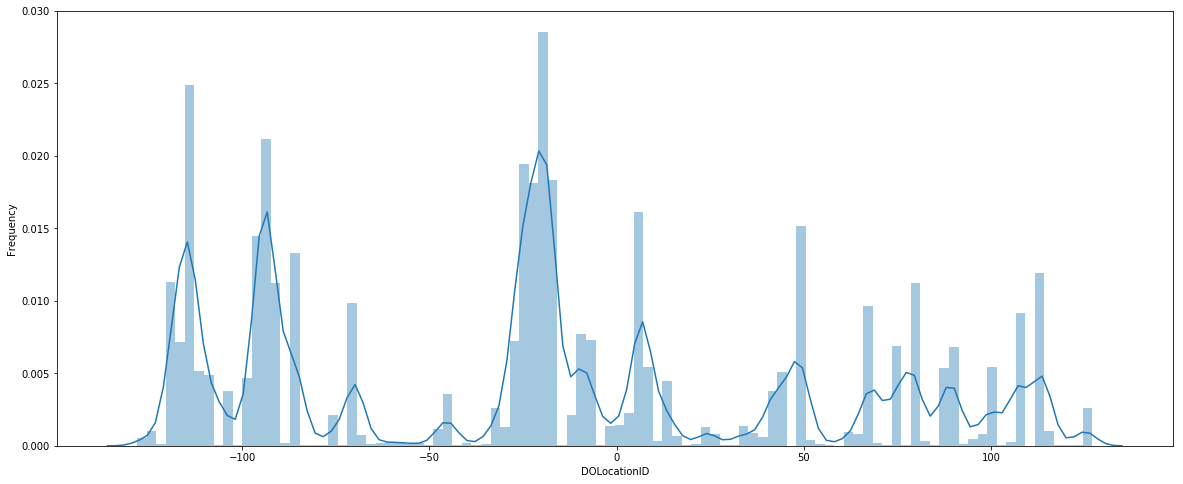

In [39]:
plt.figure(figsize=(20,8))
sns.distplot(df_in['DOLocationID'], bins = 100 )

plt.xlabel('DOLocationID')
plt.ylabel('Frequency')
plt.show()

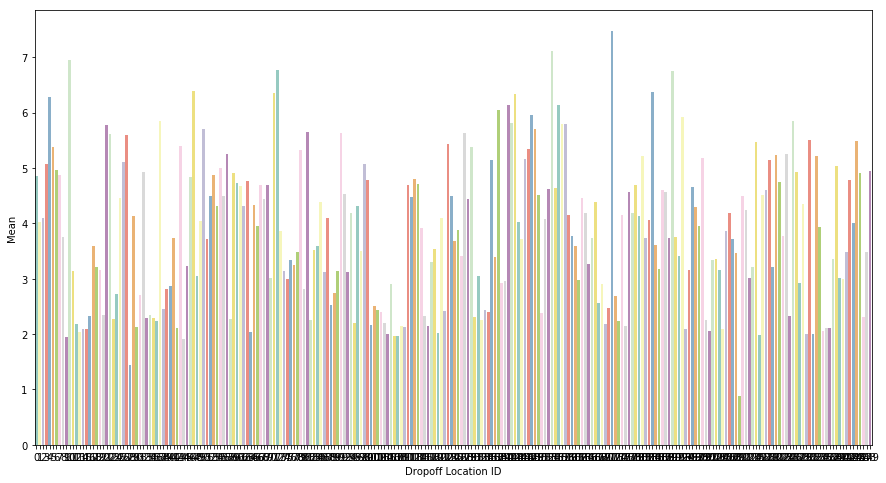

In [40]:
dropoff_tip = df_in.groupby(['DOLocationID'])['tip_amount'].mean().reset_index()
pfig, ax = plt.subplots(figsize=(15,8))

sns.barplot(dropoff_tip.index, dropoff_tip['tip_amount'], palette = "Set3")

plt.xlabel('Dropoff Location ID')
plt.ylabel('Mean')
plt.show()

It's not as clear as with Pickup Location, but there are some Dropoff neighbourhoods with higher tips

In [41]:
dropoff_tip.sort_values('tip_amount', ascending=False)

,DOLocationID,tip_amount
172,46,7.481855
154,27,7.105294
10,-118,6.959374
72,-55,6.767803
190,64,6.753586
47,-81,6.390809
184,58,6.372442
71,-56,6.359993
143,16,6.330445
4,-124,6.287821


#### Tip -  RateCodeID

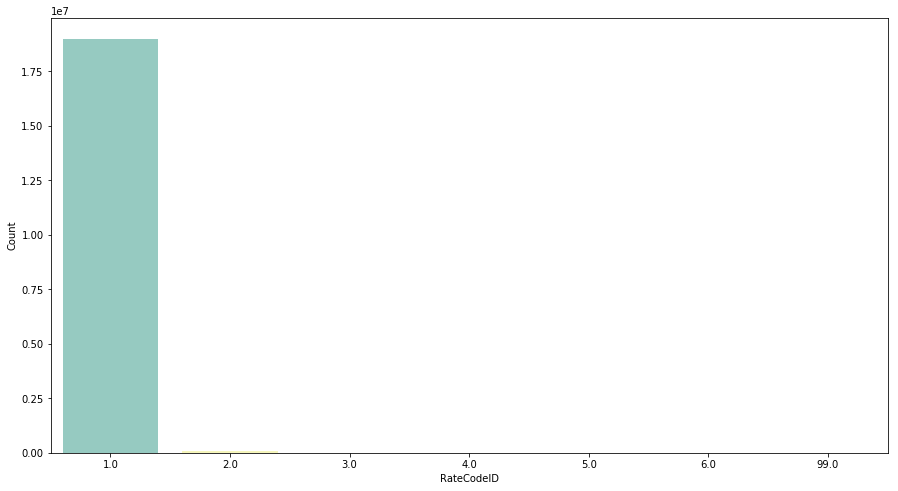

In [42]:
rate = df_in.groupby(['RatecodeID']).count()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(rate.index, rate['VendorID'], palette = "Set3")

plt.xlabel('RateCodeID')
plt.ylabel('Count')
plt.show()

Trips have mainly RateCode = 1, standard rate

Text(0, 0.5, 'Tip')

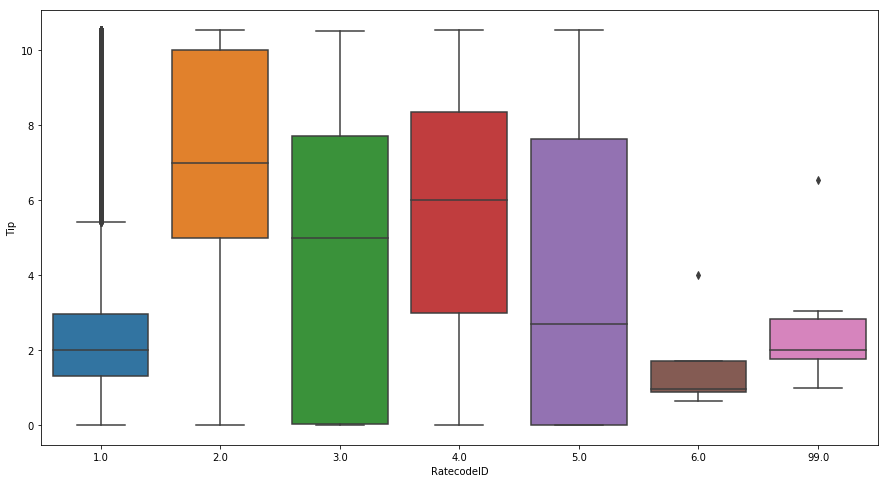

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_in['RatecodeID'], y=df_in['tip_amount'])
plt.xlabel('RatecodeID')
plt.ylabel('Tip')

We can see that trips from JFK (RateCodeID = 2) do not have tips. 

Trips from RateCodeID 3 and 4 have high variability, but also higher tips. 

Trips from RateCodeID = 1 (Standard rate) are quite similar, but there are several outliers

### Correlation

Let's see the correlation among the features and the target (tip_amount

In [48]:
#Scaling data and calculating correlation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_in.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag'], axis=1)),
                        columns = df_in.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag'], axis=1).columns)
corr = round(X_scaled.corr(),3)

C:\Users\arturo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int8, float32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\arturo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int8, float32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [49]:
cmap = sns.diverging_palette(250,10,as_cmap=True)

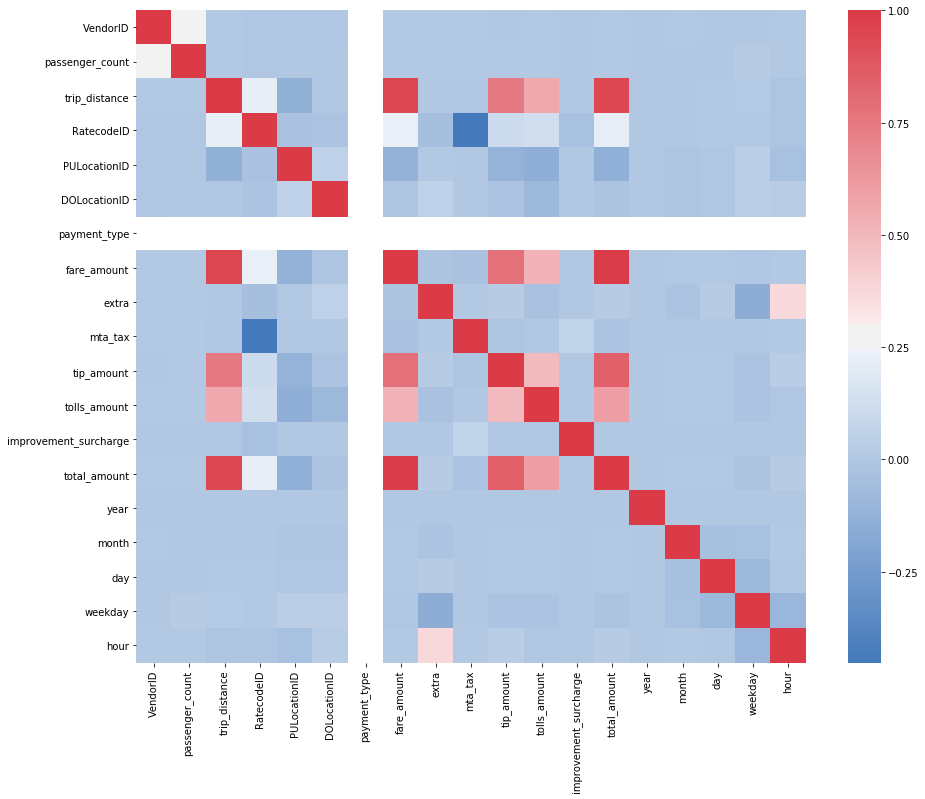

In [50]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(corr, cmap = cmap)

We can see that variables such as fare_amount, total_amount and trip_distance are highly correlated with the target. In fact, fare_amount and total_amount are highly correlated. We should not use both variables in our models

# Model building  <a name="model"></a>

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm

In [52]:
df_in.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,year,month,day,weekday,hour
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1.0,N,-108,48,1,...,0.5,3.06,0.0,0.3,18.360001,2017,3,9,3,21
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1.0,N,79,-94,1,...,0.5,2.82,0.0,0.3,14.120000,2017,3,9,3,22
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1.0,N,-19,41,1,...,0.5,3.99,0.0,0.3,17.290001,2017,3,9,3,22
5,1,2017-03-01 00:00:00,2017-03-01 00:14:22,1,2.80,1.0,N,5,79,1,...,0.5,1.00,0.0,0.3,14.800000,2017,3,1,2,0
6,1,2017-03-01 00:00:00,2017-03-01 00:19:30,1,6.00,1.0,N,87,-114,1,...,0.5,3.50,0.0,0.3,24.299999,2017,3,1,2,0


### Data preparation  <a name="data_preparation"></a>

In [53]:
# Drop columns not used in training
# VendorID and store_and_fwd_flag do not seem relevant. 
# Datetimes are string, and info from dates are being used as derived features such as month, day, weekday, hour
df_in_train = df_in.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag'], axis=1)

In [54]:
X = df_in_train.iloc[:,df_in_train.columns != 'tip_amount']
y = df_in_train['tip_amount'].values

In [55]:
# Split randomly train (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(15276562, 17) (15276562,)
(3819141, 17) (3819141,)


### Training <a name="train"></a>

#### RF

Random Forest is a good technique for regression models, that tackle overfitting quite well and work with high data volume. 

The evaluation metric I've chosen is root mean-squared error or RMSE. RMSE measures the difference between the predictions and true values. The larger the RMSE, the worst the prediction is. RMSE error is given in the same units as prediction, so we can tell how good/bad our model is.

In [58]:
# Initializing the model
model  = RandomForestRegressor()

params = {'max_features':'sqrt','max_depth': 5 , 'n_estimators':50, 'random_state':42}
# We set number of estimators to 50 so the training process does not take too long, but to take advantage
# of a proper random forest.
# Max depth = 5. The deeper the tree, the more splits it has. It would capture more information but it
# could overfit.

model_rf = model.set_params(**params)

In [59]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [60]:
rf_predict = model_rf.predict(X_test)

In [63]:
lrmse = np.sqrt(metrics.mean_squared_error(rf_predict, y_test))
lrmse

0.9631518360866016

That means our model error is \\$0.96

In [64]:
y_pred = pd.DataFrame(np.transpose([rf_predict.transpose(), y_test]), 
                      columns = ['pred_tip', 'true_tip'])

In [65]:
y_pred['true_tip'].mean()

2.4360287960447096

Taking into account that the mean tip is \\$2.34, an error of \\$0.96 is not that good (almost 40%)

#### LGBM

Light GBM are showing good results in the literature, with large datasets. Let's try it.

Parameters used are the default ones, and some modified ones like learning_rate or min_split_gain, that controlls how fast the model learns. 

In [67]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

In [68]:
train_set = lgbm.Dataset(X_train, y_train, silent=True)
train_set

In [69]:
model_lgbm = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [70]:
# Get prediction
lgbm_predict = np.zeros(X_test.shape[0])
lgbm_predict = model_lgbm.predict(X_test, num_iteration = model_lgbm.best_iteration)


In [71]:
lrmse = np.sqrt(metrics.mean_squared_error(lgbm_predict, y_test))
lrmse

0.3231772400158208

In [72]:
y_pred = pd.DataFrame(np.transpose([lgbm_predict.transpose(), y_test]), 
                      columns = ['pred_tip', 'true_tip'])

In [73]:
y_pred['true_tip'].mean()

2.4360287960447096

In this case, the model gets an error of \\$0.32, which is 13\% of average tip

### Validation  <a name="val"></a>

Let's validate our model with a new month of data. For example, december. We can then be more certain that the error obtained in the training and testing phase are accurate

#### Data preparation

In [74]:
%%time
#Load data
file ='yellow_tripdata_2017-12.csv'
df_val_raw = pd.read_csv(os.path.join(PATH, file), usecols = cols, dtype = types)
df_val_raw = df_val_raw.drop_duplicates()

Wall time: 1min 4s


In [75]:
#Clean data
df_val_clean = df_val_raw[(df_val_raw['passenger_count']>0) & 
                          ( df_val_raw['passenger_count']<= df_val_raw['passenger_count'].quantile(0.99))]

print('Total taxi trips: ', len (df_val_raw))
print('\tTaxi trips with passenger_count > 0: ', len(df_val_clean), '(%.2f%%)'%(len(df_val_clean)/(len(df_val_raw))*100))
print()


df_val_clean = df_val_clean[(df_val_clean['trip_distance'] > 0) 
                            & (df_val_clean['trip_distance'] <= df_val_clean['trip_distance'].quantile(0.99))]

print('\tTaxi trips with distance > 0: ', len(df_val_clean), '(%.2f%%)'%(len(df_val_clean)/(len(df_val_raw))*100))
print()


df_val_clean = df_val_clean[(df_val_clean['fare_amount']>0) 
                            & (df_val_clean['fare_amount'] <= df_val_clean['fare_amount'].quantile(0.99))]

print('\tTaxi trips with %s > 0: '%(var), len(df_val_clean), '(%.2f%%)'%(len(df_val_clean)/(len(df_val_raw))*100))
print()
    
    
for var in ['extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'mta_tax']:
    df_val_clean = df_val_clean[(df_val_clean[var]>=0) & (df_val_clean[var] <= df_val_clean[var].quantile(0.99))]
    
    print('\tTaxi trips with %s >= 0: '%(var), len(df_val_clean), '(%.2f%%)'%(len(df_val_clean)/(len(df_val_raw))*100))
    print()

Total taxi trips:  9508276
	Taxi trips with passenger_count > 0:  9449813 (99.39%)

	Taxi trips with distance > 0:  9297027 (97.78%)

	Taxi trips with mta_tax > 0:  9260156 (97.39%)

	Taxi trips with extra >= 0:  9235734 (97.13%)

	Taxi trips with tip_amount >= 0:  9143460 (96.16%)

	Taxi trips with tolls_amount >= 0:  9138858 (96.11%)

	Taxi trips with improvement_surcharge >= 0:  9138858 (96.11%)

	Taxi trips with mta_tax >= 0:  9138857 (96.11%)



In [76]:
#We can only provide a tip amount prediction for credit card payments
#Well, we could provide a tip for every trip, but we can only validate with those with credit card payment
df_val = df_val_clean[df_val_clean['payment_type']==1]

print('Taxi trips paid with credit card: ',len(df_val),
                                          '(%.2f%%)'%(len(df_val)/(len(df_val_clean))*100))

Taxi trips paid with credit card:  6040087 (66.09%)


In [77]:
#Generation of features
# Type conversion to datetime
df_val['tpep_pickup_datetime'] = pd.to_datetime(df_val['tpep_pickup_datetime'])
df_val['tpep_dropoff_datetime']  = pd.to_datetime(df_val['tpep_dropoff_datetime'])

# Split dates to get fields like day, hour, weekday.
# We'll check if tip depends on them
df_val['year'] = df_val['tpep_pickup_datetime'].dt.year
df_val['month'] = df_val['tpep_pickup_datetime'].dt.month
df_val['day'] = df_val['tpep_pickup_datetime'].dt.day
df_val['weekday'] =df_val['tpep_pickup_datetime'].dt.dayofweek
df_val['hour'] = df_val['tpep_pickup_datetime'].dt.hour

C:\Users\arturo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\arturo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\arturo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

#### Predicting

In [78]:
# Prepare data
df_val = df_val.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag'], axis=1)
X_val = df_val.iloc[:,df_val.columns != 'tip_amount']
y_val = df_val['tip_amount'].values

#### Random Forest

In [79]:
# Get prediction
rf_predict_val = model_rf.predict(X_val)

In [80]:
# Check RMSE
lrmse_rf_val = np.sqrt(metrics.mean_squared_error(rf_predict_val, y_val))
lrmse_rf_val

0.9601195064350377

In [81]:
#Check distribution of predicted tips vs real tips
y_pred_val = pd.DataFrame(np.transpose([rf_predict_val.transpose(), y_val]), 
                      columns = ['pred_tip', 'true_tip'])

C:\Users\arturo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


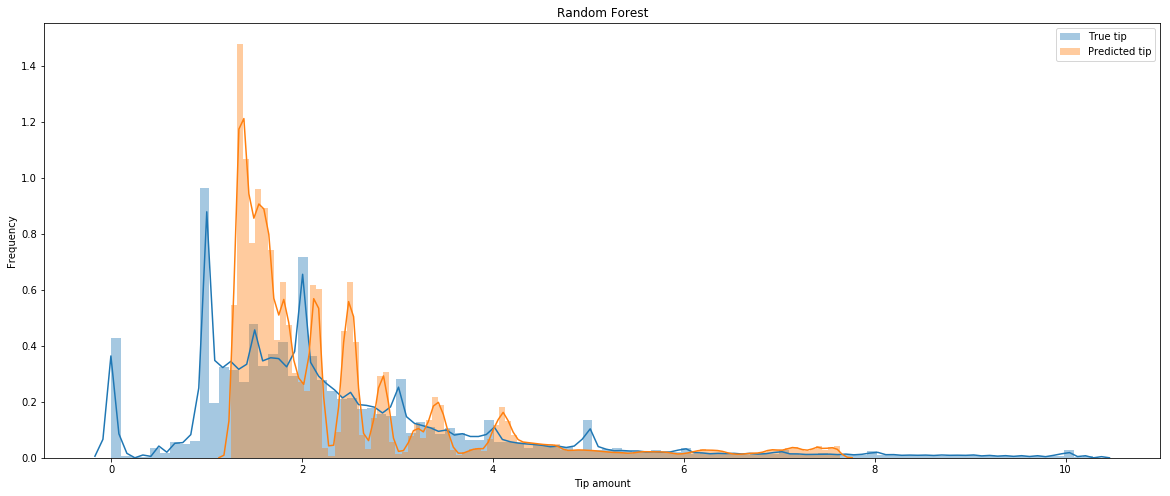

In [82]:
plt.figure(figsize=(20,8))
sns.distplot(y_pred_val['true_tip'], bins = 100 )
sns.distplot(y_pred_val['pred_tip'], bins = 100 )


plt.xlabel('Tip amount')
plt.ylabel('Frequency')
plt.legend(['True tip', 'Predicted tip'])
plt.title('Random Forest')
plt.show()

It is quite surprising that Random Forest prediction's minimum value is greater than 1.5$

#### LGBM

In [83]:
# Get prediction
lgbm_predict_val = np.zeros(X_val.shape[0])
lgbm_predict_val = model_lgbm.predict(X_val, num_iteration = model_lgbm.best_iteration)


In [84]:
# Check RMSE
lrmse_val = np.sqrt(metrics.mean_squared_error(lgbm_predict_val, y_val))
lrmse_val

0.32600472443838974

In [85]:
#Check distribution of predicted tips vs real tips
y_pred_val = pd.DataFrame(np.transpose([lgbm_predict_val.transpose(), y_val]), 
                      columns = ['pred_tip', 'true_tip'])

C:\Users\arturo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


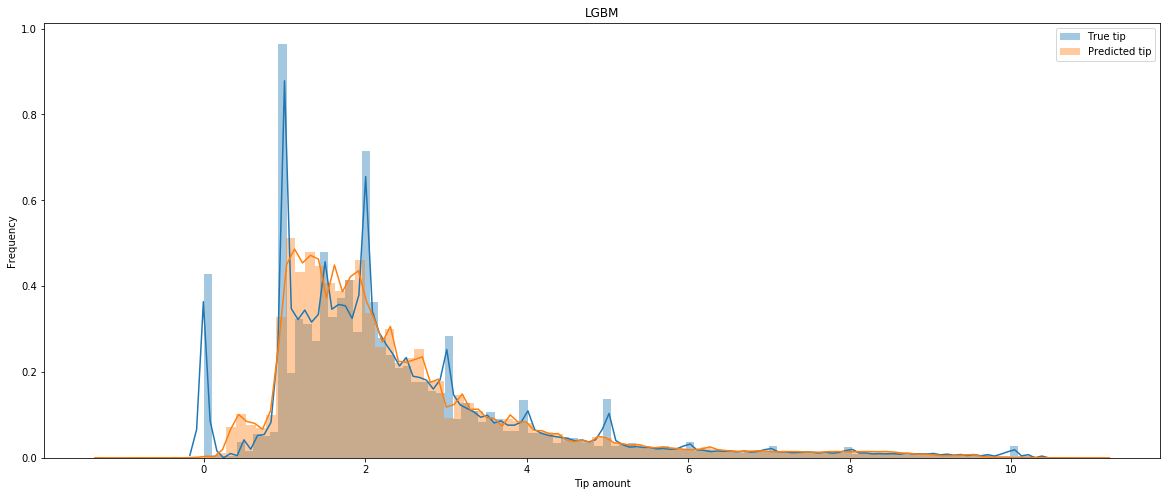

In [86]:
plt.figure(figsize=(20,8))
sns.distplot(y_pred_val['true_tip'], bins = 100 )
sns.distplot(y_pred_val['pred_tip'], bins = 100 )


plt.xlabel('Tip amount')
plt.ylabel('Frequency')
plt.legend(['True tip', 'Predicted tip'])
plt.title('LGBM')
plt.show()

Predictions and true values are quite similarly distributed. But...we get negative values for tip amounts! We have to change those negative values for 0

### Improvements  <a name="improvements"></a>

* Cross-validation: in the training process, to be sure that our models are not overfitting
* Ensemble: for example, a combination of different algorithms. It reduces bias and variance of the final model and the risk of overfitting is lower.
* Hyperparameter optimization: in order to optimize the models, we should carry on a Grid Search that finds optimal parameters for training
* Features
    - Add external data, such as weather data. Rainy days can have more taxi trips than sunny ones. 
    - Weekday should be a dummy variable, in order to have the same "distance" between Monday(0) and Tuesday(1) than from Sunday(6) to Monday(0). It should be a categorical variable. 
    - Month and hour may also be treated as categorical variables.
    - Check if too correlated variables (total_amount, fare_amount) are good or not for the models.
    - Use of the whole dataset, or at least a whole year, to be able to get seasonality, in case it exists.

For the company to use this model, an API can be built. 
It could be an app, used by the rider, that automatically generate all the input data from the ride (pickup and dropoff datetime and location, distance, fare, extras, ...). This app will connect with the API, sending all the information (our features) and the API will trigger the execution of the model, returning a tip prediction
This API can be built using Flask